                                 usage
time                                  
2016-12-11 20:27:12.289060040  2743117
2016-12-11 20:32:14.878170533  2743126
2016-12-11 20:33:15.043069533  2743132
2016-12-11 20:34:15.759697388  2743132
2016-12-11 20:36:17.195340174  2743135
2016-12-11 20:38:14.467751875  2743138
2016-12-11 20:39:13.684691698  2743138
2016-12-11 20:40:16.902307418  2743144
2016-12-11 20:42:16.838388625  2743144
2016-12-11 20:45:16.048321866  2743153
2016-12-11 20:46:18.213112892  2743153
2016-12-11 20:48:16.648216116  2743158
2016-12-11 20:49:18.866586969  2743158
2016-12-11 20:50:17.030929519  2743158
2016-12-11 20:52:18.965152779  2743162
2016-12-11 20:57:21.555408161  2743170
2016-12-11 20:58:21.219818719  2743171
2016-12-11 20:59:18.937334434  2743171
2016-12-11 21:01:22.428228074  2743171
2016-12-11 21:03:19.864970788  2743178
                     usage  elapsed         sec     power
time                                                     
2016-12-11 20:15:00    NaN

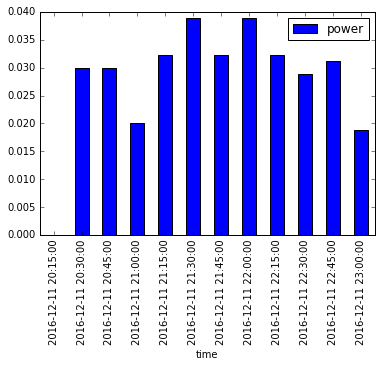

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np

df = pd.read_csv('/home/petrum/doc/16rce.csv', parse_dates=[0], \
            date_parser=lambda x: pd.to_datetime(x.rpartition('-')[0]), \
            names=['time', 'id', 'usage'], usecols=[0, 3, 7], \
            index_col=1).ix[20183568].set_index('time')
print(df.head(20))
df = df.resample(rule='15min', how='last')

#print(df.head())
df = df.reset_index()

df['elapsed'] = df['time']
df = df.set_index('time')
df = df.diff()
df['sec'] = (df.elapsed.astype(np.int64) / 1000000000).astype(int)
df['power'] = df.usage / df.sec
df = df[df.usage != 0]
print(df.head())
df.drop(df.columns[[0, 1, 2]], axis=1, inplace=True)
#@print(df)
df.plot(kind='bar')
